<a href="https://colab.research.google.com/github/Noobs-in-Devhack/AI---ML-/blob/main/Linear_Regression_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Step 1. Import Libraries and Read DataSets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/house_sales_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### Step 2. Data Manipulation

In [ ]:
# returns number of missing data in each column , 0 indicates no missing values,
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Assumptions of Linear Regression
    * Is Label is Normally Distributed ?

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='price', ylabel='Density'>

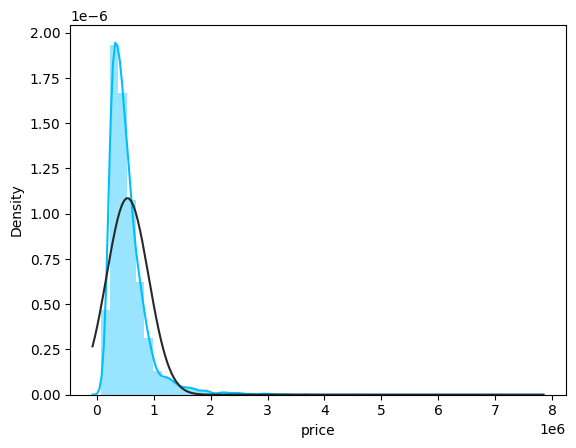

In [ ]:
from scipy.stats import norm
sns.distplot(df['price'], fit = norm, color = 'deepskyblue')

<Axes: xlabel='price'>

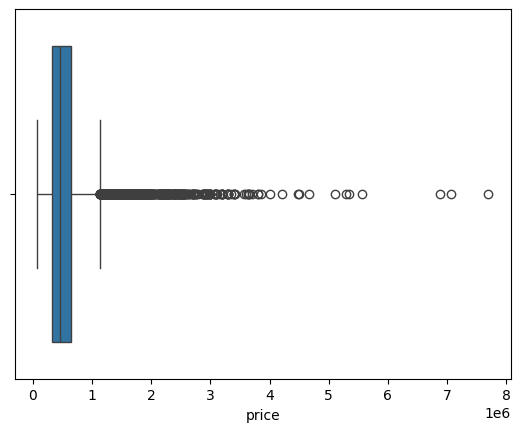

In [ ]:
sns.boxplot(df['price'], orient = 'h')

In [ ]:
house_df = df.drop(['id','date'], axis = 1)

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(house_df))

In [ ]:
np.where((z > 3))       # Any value greater than 3rd std deviation is outliers.

(array([    1,     5,     5, ..., 21590, 21590, 21600]),
 array([13,  2,  3, ..., 11, 17, 10]))

In [ ]:
len(np.where((z > 4))[0]) / house_df.shape[0]

0.11696664044787859

In [ ]:
house_df.shape

(21613, 19)

In [ ]:
house_df1 = house_df.drop(np.where((z > 4))[0])

<Axes: xlabel='price', ylabel='Density'>

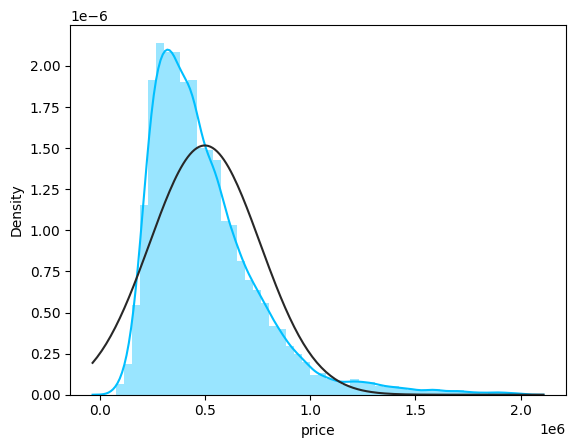

In [ ]:
sns.distplot(house_df1['price'], fit = norm, color = 'deepskyblue')

#### is there any multicollinearity ?

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = house_df1.drop(['price'], axis = 1)
x = x.astype(float)
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [ ]:
vif_data

,Features,VIF
0,bedrooms,2.707209e+01
1,bathrooms,2.977222e+01
2,sqft_living,inf
3,sqft_lot,4.314193e+00
4,floors,1.780241e+01
5,waterfront,NaN
6,view,1.214920e+00
7,condition,3.496161e+01
8,grade,1.538437e+02
9,sqft_above,inf


#### Features & Target

In [ ]:
X = house_df1.drop(['sqft_living','waterfront','sqft_above','sqft_basement','yr_renovated',
                    'zipcode','long','price'], axis = 1)
Y = house_df1['price']

#### Cross-Validation
    * Split Data into train & test

In [ ]:
from sklearn.model_selection import train_test_split
# test_size = 0.2 (20%) , train_size = 80%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [ ]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr_model.score(x_test, y_test)   # R2-Score (0-1)

0.6908758659042911

Regression Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
y_pred = lr_model.predict(x_test)

In [ ]:
# MSE
mean_squared_error(y_test, y_pred)

20316311666.669315

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

142535.29972139993

In [ ]:
Y.mean()

499585.7332290142

In [ ]:
r2_score(y_test, y_pred)

0.6908758659042911